In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pylab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
snore = pd.read_csv("C:\\Users\\kumar\\snore12.csv")


In [6]:
snore

,sno,name,sex,bmi,totalsleeptime,apneascount,hypopneascount,ahtotalcount,apneasindex,hypopneasindex,ahi
0,1,Rukum Bai,F,38.4000,247.5,66,69,135,16.0,16.7,32.7
1,2,N.Sanjay,M,24.0900,245.0,22,120,142,5.4,29.4,34.8
2,3,G.Swapna,F,29.6700,387.5,1,14,15,0.2,2.2,2.3
3,4,N.venkateswarulu,M,28.4000,336.0,297,197,494,53.0,35.2,82.2
4,5,E.Vivek kumar,M,37.1000,320.5,43,311,354,8.0,52.8,66.3
5,6,Charanjeet singh,M,46.4400,390.5,213,269,482,32.7,41.3,74.1
6,7,Devesh devangan,M,30.0200,421.5,345,34,379,49.1,4.8,54.0
7,8,G.S.S.Rajasekhar,M,19.8400,222.5,1,1,2,0.3,0.3,0.5
8,9,George,M,27.3400,322.5,63,148,211,11.7,27.5,39.3
9,10,mohammed aadam,M,38.4200,229.0,166,139,305,43.5,36.4,79.9


In [7]:
x = snore.iloc[:, :-1].values  ## independent variables
y=snore.iloc[:,10] ## dpendent variables

#  exploratory data analysis

In [8]:
# 1st business moment decision---central tendency
snore.mean()


sno                43.500000
bmi                32.677338
totalsleeptime    285.643023
apneascount       110.813953
hypopneascount    103.790698
ahtotalcount      215.186047
apneasindex        27.523256
hypopneasindex     24.188372
ahi                51.711628
dtype: float64

In [9]:
snore.median()

sno                43.500
bmi                31.815
totalsleeptime    280.000
apneascount        65.500
hypopneascount     81.000
ahtotalcount      183.500
apneasindex        16.100
hypopneasindex     19.600
ahi                48.100
dtype: float64

In [10]:
snore.describe()

,sno,bmi,totalsleeptime,apneascount,hypopneascount,ahtotalcount,apneasindex,hypopneasindex,ahi
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,43.500000,32.677338,285.643023,110.813953,103.790698,215.186047,27.523256,24.188372,51.711628
std,24.969982,6.959469,91.772214,111.889916,84.731842,142.066804,29.888989,19.093328,33.704129
min,1.000000,15.900000,71.000000,0.000000,1.000000,2.000000,0.000000,0.300000,0.500000
25%,22.250000,28.392500,213.125000,25.500000,38.250000,95.000000,5.650000,9.450000,26.175000
50%,43.500000,31.815000,280.000000,65.500000,81.000000,183.500000,16.100000,19.600000,48.100000
75%,64.750000,36.705000,365.375000,167.500000,147.750000,315.250000,42.850000,34.725000,76.825000
max,86.000000,55.620000,487.000000,390.000000,370.000000,660.000000,141.800000,85.400000,154.900000


In [11]:
# # 2-->Variance,Standard Deviation and Range:

# In[226]:


print("Variances:")
print("-------------------------------")
print(np.var(snore))
print("\nStandard Deviation:")
print("-------------------------------")
print(np.std(snore))



Variances:
-------------------------------
sno                 616.250000
bmi                  47.871018
totalsleeptime     8324.207335
apneascount       12373.779340
hypopneascount     7096.002704
ahtotalcount      19948.290968
apneasindex         882.963878
hypopneasindex      360.316144
ahi                1122.759400
dtype: float64

Standard Deviation:
-------------------------------
sno                24.824383
bmi                 6.918888
totalsleeptime     91.237094
apneascount       111.237491
hypopneascount     84.237775
ahtotalcount      141.238419
apneasindex        29.714708
hypopneasindex     18.981995
ahi                33.507602
dtype: float64


In [9]:
""" we know data of any distribution lies between mean+sd and mean-sd
we can analyse where most data is distributed using variance and mean
"""

' we know data of any distribution lies between mean+sd and mean-sd\nwe can analyse where most data is distributed using variance and mean\n'

In [10]:
snore.columns

Index(['sno', 'name', 'sex', 'bmi', 'totalsleeptime', 'apneascount',
       'hypopneascount', 'ahtotalcount', 'apneasindex', 'hypopneasindex',
       'ahi'],
      dtype='object')

####  3rd business movement decision skewness

In [12]:
for c in snore.columns:
    if c == "name" or c=="sno" or c=='sex':
        continue
    else:
        print(c+":    "+ str(stats.skew(snore[c])))


bmi:    0.7744078190139316
totalsleeptime:    0.17174148607065443
apneascount:    1.048153196967105
hypopneascount:    1.1590189496022894
ahtotalcount:    0.6687190853249921
apneasindex:    1.439052981270102
hypopneasindex:    1.1082977877488909
ahi:    0.5850680902419614


In [12]:
"""we obseve thatskwness is +ve mean>median
"""

'we obseve thatskwness is +ve mean>median\n'

####  4th business movement decison --- kurtosis

In [13]:
for c in snore.columns:
    if c == "name" or c=="sno" or c=='sex':
        continue
    else:
        print(c+":    "+ str(stats.kurtosis(snore[c])))


bmi:    0.9825334085131057
totalsleeptime:    -0.7984120367067988
apneascount:    -0.19610059480126285
hypopneascount:    0.8879403263312766
ahtotalcount:    0.059014794781830915
apneasindex:    1.603579917773775
hypopneasindex:    0.9103125719112883
ahi:    0.07687916614308721


In [15]:
""" kutosis is less than 3 ,so less outliers,less standard deviation ,data set is perfect or 
we can consider this daata set"""

' kutosis is less than 3 ,so less outliers,less standard deviation ,data set is perfect or \nwe can consider this daata set'

In [14]:
### distributions based on sex

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


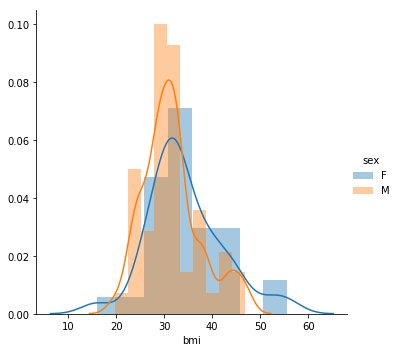

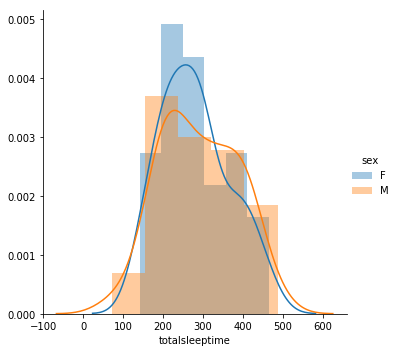

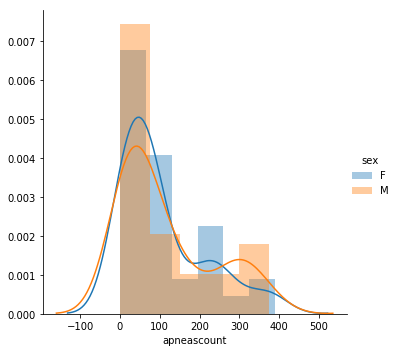

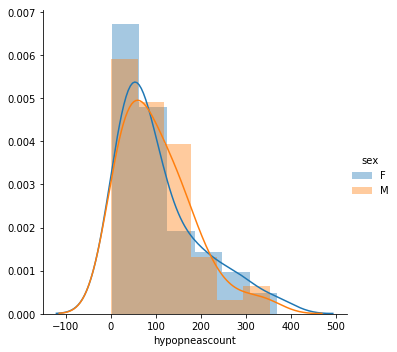

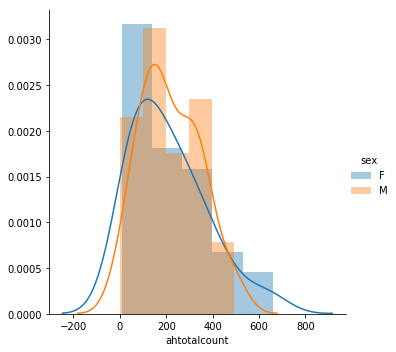

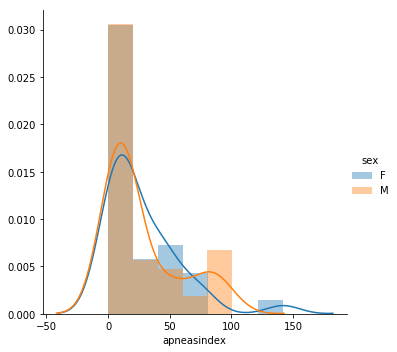

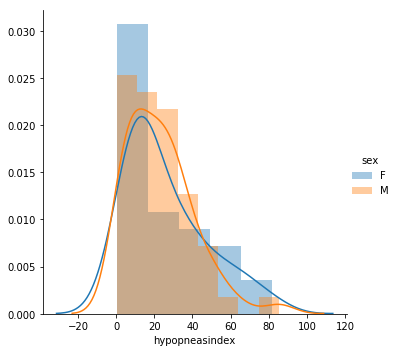

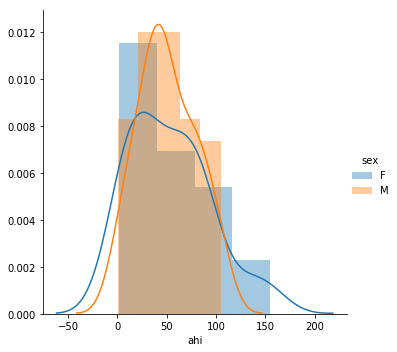

In [13]:
for c in snore.columns:
    if c == "name" or c=="sno" or c=='sex':
        continue
    else:
        sns.FacetGrid(snore,hue="sex",height=5).map(sns.distplot,c).add_legend()
        plt.show()


#####  BOX PLOTS TO SHOW OUTLIERS AS IT IS CONTINOUS DATA

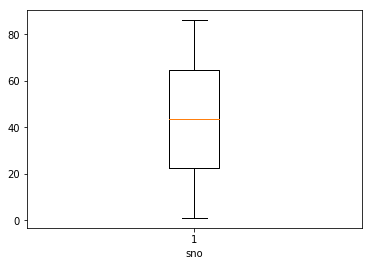

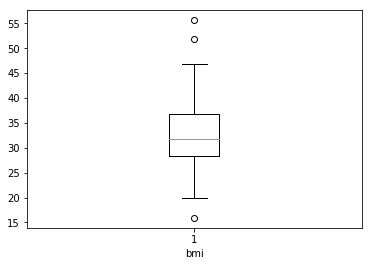

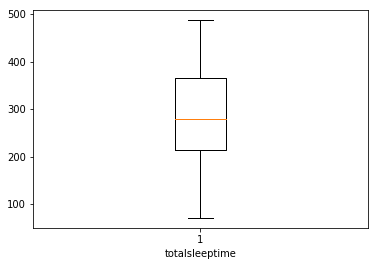

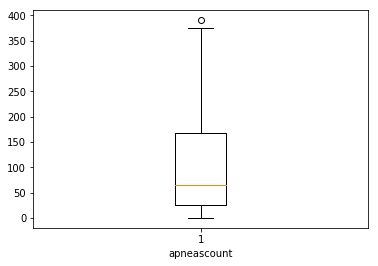

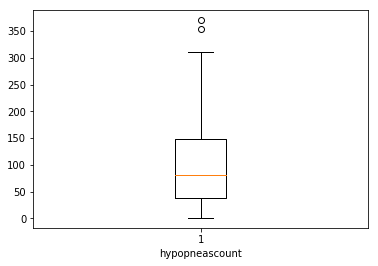

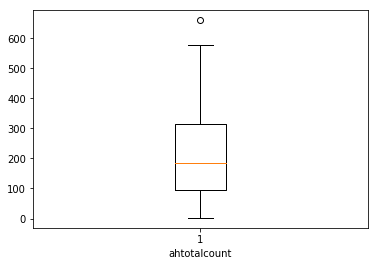

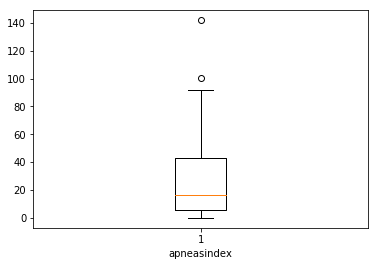

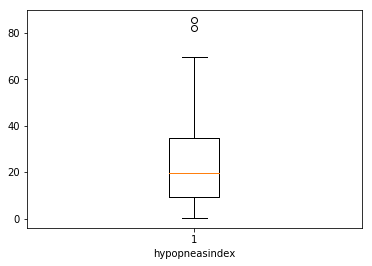

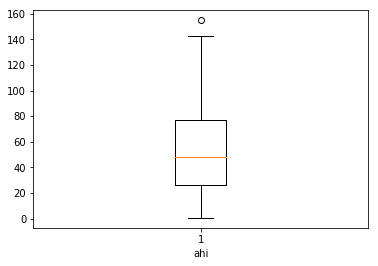

In [14]:
for c in snore.columns:
    if c == "name" or c=='sno ' or c=='sex':
        continue
    else:
        plt.boxplot(snore[c])
        plt.xlabel(c)
        plt.show()

#### TO SHOW RELATION BETWEEN INDEPENDET VARIABLES

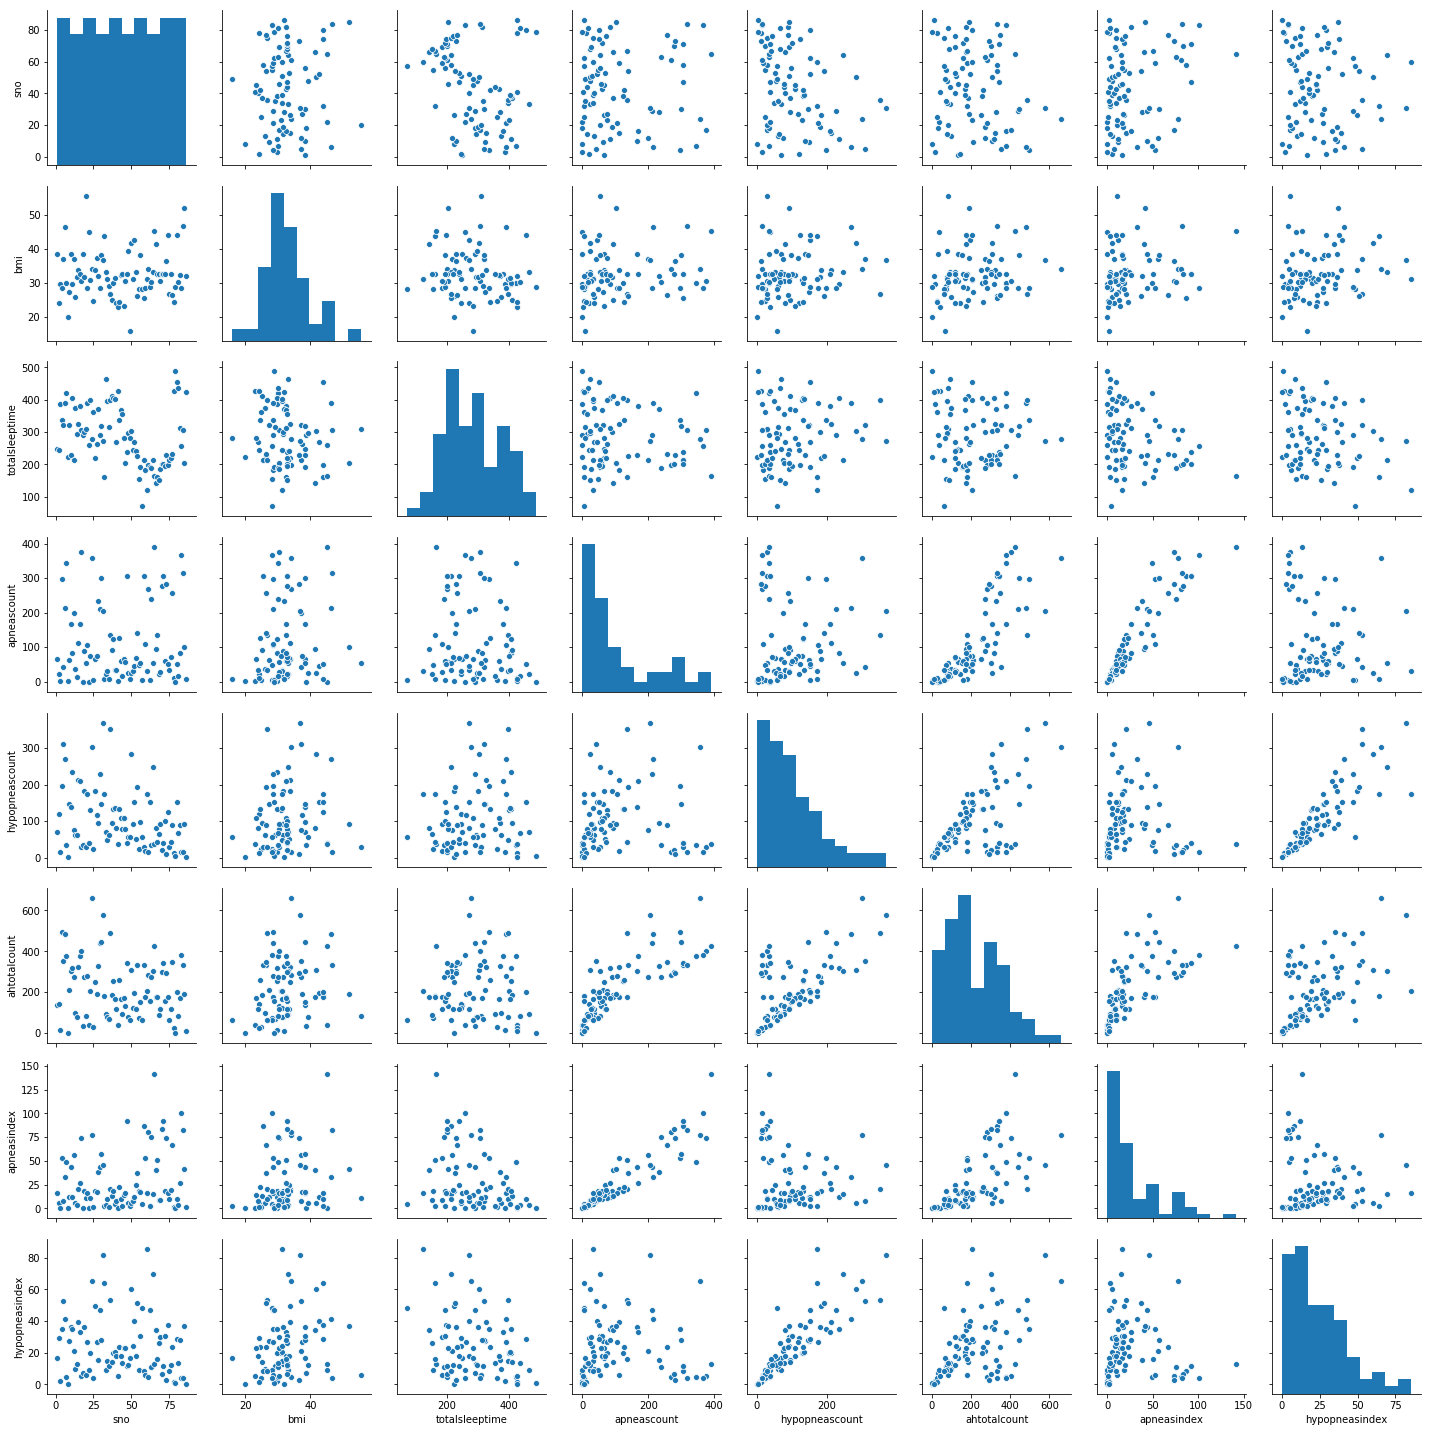

In [18]:
sns.pairplot(snore.iloc[:,:-1])

In [19]:
# all are not uniformly distributed ,may contain some outliers

##### as inputs from domain expert ahi value only depends on apneas count,hypoapneas count,ah total count and sleep time


###  ahi value does not depend on name,sex so building model removing those

In [156]:
snore.columns

Index(['sno', 'name', 'sex', 'bmi', 'totalsleeptime', 'apneascount',
       'hypopneascount', 'ahtotalcount', 'apneasindex', 'hypopneasindex',
       'ahi'],
      dtype='object')

## regression model 

In [157]:
snore

,sno,name,sex,bmi,totalsleeptime,apneascount,hypopneascount,ahtotalcount,apneasindex,hypopneasindex,ahi
0,1,Rukum Bai,F,38.4000,247.5,66,69,135,16.0,16.7,32.7
1,2,N.Sanjay,M,24.0900,245.0,22,120,142,5.4,29.4,34.8
2,3,G.Swapna,F,29.6700,387.5,1,14,15,0.2,2.2,2.3
3,4,N.venkateswarulu,M,28.4000,336.0,297,197,494,53.0,35.2,82.2
4,5,E.Vivek kumar,M,37.1000,320.5,43,311,354,8.0,52.8,66.3
5,6,Charanjeet singh,M,46.4400,390.5,213,269,482,32.7,41.3,74.1
6,7,Devesh devangan,M,30.0200,421.5,345,34,379,49.1,4.8,54.0
7,8,G.S.S.Rajasekhar,M,19.8400,222.5,1,1,2,0.3,0.3,0.5
8,9,George,M,27.3400,322.5,63,148,211,11.7,27.5,39.3
9,10,mohammed aadam,M,38.4200,229.0,166,139,305,43.5,36.4,79.9


In [165]:
model=smf.ols('ahi~bmi+totalsleeptime+ahtotalcount+apneascount+hypopneascount+apneasindex+hypopnnore).easindex',data=sfit()

In [166]:
model.params

Intercept        -0.130322
bmi               0.010560
totalsleeptime   -0.000490
ahtotalcount     -0.008297
apneascount       0.001071
hypopneascount    0.014308
apneasindex       1.021694
hypopneasindex    0.979741
dtype: float64

In [167]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ahi   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.817e+04
Date:                Tue, 02 Apr 2019   Prob (F-statistic):          1.61e-122
Time:                        01:14:38   Log-Likelihood:                -105.94
No. Observations:                  86   AIC:                             227.9
Df Residuals:                      78   BIC:                             247.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1303      0.734     -0.178      0.859      -1.591       1.330
bmi                0.0106      0.014      0.738      0.462      -0.018       0.039
totalsleeptime    -0.0005      0.002     -0.275      0.784      -0.004       0.003
ahtotalcount      -0.0083      0.018     -0.450      0.654      -0.045       0.028
apneascount        0.0011      0.018      0.060      0.953      -0.035       0.037
hypopneascount     0.0143      0.019      0.747      0.457      -0.024       0.052
apneasindex        1.0217      0.012     81.811      0.000       0.997       1.047
hypopneasindex     0.9797      0.015     65.758      0.000       0.950       1.009
==============================================================================
Omnibus:                       61.114   Durbin-Watson:                   2.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3601.624
Skew:                          -1.104   Prob(JB):                         0.00
Kurtosis:                      34.626   Cond. No.                     3.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
## model1.confint(0.05)

In [20]:
### apneas index and hypopneas index became less significant
### so lets construct the model ignoring this and check others significance

In [21]:
model1=smf.ols('ahi~totalsleeptime+apneascount+hypopneascount+bmi',data=snore).fit()

In [22]:
model1.params

Intercept         41.346550
totalsleeptime    -0.142466
apneascount        0.218525
hypopneascount     0.160260
bmi                0.312458
dtype: float64

In [23]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ahi   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     215.3
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           2.64e-42
Time:                        08:00:24   Log-Likelihood:                -318.53
No. Observations:                  86   AIC:                             647.1
Df Residuals:                      81   BIC:                             659.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         41.3466      6.813      6.069      0.000      27.790      54.903
totalsleeptime    -0.1425      0.012    -11.597      0.000      -0.167      -0.118
apneascount        0.2185      0.010     21.989      0.000       0.199       0.238
hypopneascount     0.1603      0.013     12.143      0.000       0.134       0.187
bmi                0.3125      0.162      1.930      0.057      -0.010       0.635
==============================================================================
Omnibus:                       10.190   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.829
Skew:                           0.669   Prob(JB):                      0.00445
Kurtosis:                       4.109   Cond. No.                     2.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model2=smf.ols('ahi~apneasindex+hypopneasindex+bmi+totalsleeptime',data=snore).fit()

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ahi   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.029e+04
Date:                Tue, 02 Apr 2019   Prob (F-statistic):          1.06e-127
Time:                        08:00:52   Log-Likelihood:                -109.67
No. Observations:                  86   AIC:                             229.3
Df Residuals:                      81   BIC:                             241.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3091      0.632     -0.489      0.626      -1.567       0.949
apneasindex        0.9959      0.004    280.797      0.000       0.989       1.003
hypopneasindex     1.0011      0.005    183.205      0.000       0.990       1.012
bmi                0.0143      0.014      0.994      0.323      -0.014       0.043
totalsleeptime    -0.0003      0.001     -0.215      0.830      -0.003       0.002
==============================================================================
Omnibus:                       58.752   Durbin-Watson:                   2.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5081.706
Skew:                          -0.834   Prob(JB):                         0.00
Kurtosis:                      40.621   Cond. No.                     1.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[]

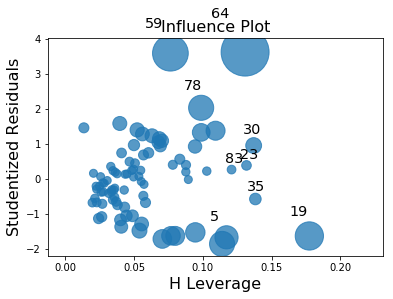

In [26]:
sm.graphics.influence_plot(model1,criterion="cooks")
plt.plot()


In [30]:
from statsmodels.formula.api import ols
m=ols('ahi~bmi+totalsleeptime+apneascount+hypopneascount+apneasindex+hypopneasindex',data=snore).fit()
infl=m.get_influence()
sm_fr=infl.summary_frame()

In [31]:
sm_fr

,dfb_Intercept,dfb_bmi,dfb_totalsleeptime,dfb_apneascount,dfb_hypopneascount,dfb_apneasindex,dfb_hypopneasindex,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.005947,-0.013519,0.013109,-0.006533,-0.005880,0.009847,0.010290,7.921834e-05,-0.114068,0.040876,-0.023548,-0.113353,-0.023401
1,-0.014748,0.011812,0.007422,0.001353,-0.004959,0.001118,0.003809,5.333107e-05,-0.089284,0.044736,-0.019321,-0.088721,-0.019200
2,0.004914,0.001876,-0.016938,0.008181,0.010996,-0.005388,-0.005685,1.746341e-04,-0.147370,0.053288,-0.034963,-0.146454,-0.034746
3,-0.537419,0.680455,0.391430,-2.193783,-0.130892,1.694953,-0.022584,6.791486e-01,-6.671612,0.096500,-2.180376,-10.033076,-3.278949
4,0.267034,0.428590,-0.795916,-1.128616,2.569192,0.783080,-1.795534,8.456832e-01,5.921026,0.144461,2.433060,7.888729,3.241626
5,0.005498,-0.011866,0.002863,-0.006684,-0.008122,0.006427,0.006697,5.700239e-05,-0.047948,0.147891,-0.019975,-0.047644,-0.019849
6,-0.086365,0.059749,0.121773,1.113058,-0.616637,-0.940999,0.391031,2.369633e-01,1.934276,0.307165,1.287922,1.969191,1.311170
7,-0.019678,0.009571,0.013229,-0.003385,-0.006394,0.006374,0.010206,6.694107e-05,-0.060344,0.114013,-0.021647,-0.059962,-0.021510
8,-0.002121,0.002140,0.000547,0.000786,-0.002128,-0.000357,0.001544,3.153411e-06,-0.027571,0.028220,-0.004698,-0.027396,-0.004668
9,0.000107,-0.000272,0.000091,-0.000078,0.000025,0.000029,-0.000085,6.172100e-08,-0.004003,0.026249,-0.000657,-0.003978,-0.000653


### cooks_d values are less. .. there are no influential points

In [35]:
### so apneas index and hypopneas index can be removed as they tend to overfit the model and have less significace

###  vif values are also high and removing those attributes

In [34]:
## so our final model contains only bmi,apneascount,hypopneascount,totalsleeptime

In [ ]:
# lets remove bmi and check  adjusted r-squared

In [36]:
model3=smf.ols('ahi~apneascount+hypopneascount+totalsleeptime',data=snore).fit()

In [37]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ahi   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     276.6
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           8.93e-43
Time:                        08:12:50   Log-Likelihood:                -320.46
No. Observations:                  86   AIC:                             648.9
Df Residuals:                      82   BIC:                             658.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         52.0081      4.052     12.834      0.000      43.947      60.069
apneascount        0.2204      0.010     21.916      0.000       0.200       0.240
hypopneascount     0.1639      0.013     12.337      0.000       0.137       0.190
totalsleeptime    -0.1461      0.012    -11.834      0.000      -0.171      -0.122
==============================================================================
Omnibus:                       13.183   Durbin-Watson:                   1.135
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.349
Skew:                           0.787   Prob(JB):                     0.000464
Kurtosis:                       4.345   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
### adjusted r squared for the model cotaining bmi,apneascount and hypopneas count is 0.907

In [39]:
# including bmi

In [40]:
model4=smf.ols('ahi~bmi+apneascount+hypopneascount+totalsleeptime',data=snore).fit()

In [41]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ahi   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     215.3
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           2.64e-42
Time:                        08:14:41   Log-Likelihood:                -318.53
No. Observations:                  86   AIC:                             647.1
Df Residuals:                      81   BIC:                             659.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         41.3466      6.813      6.069      0.000      27.790      54.903
bmi                0.3125      0.162      1.930      0.057      -0.010       0.635
apneascount        0.2185      0.010     21.989      0.000       0.199       0.238
hypopneascount     0.1603      0.013     12.143      0.000       0.134       0.187
totalsleeptime    -0.1425      0.012    -11.597      0.000      -0.167      -0.118
==============================================================================
Omnibus:                       10.190   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.829
Skew:                           0.669   Prob(JB):                      0.00445
Kurtosis:                       4.109   Cond. No.                     2.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
bmi_new=new_snore['bmi']
apneascount_new=new_snore['apneascount']
hypopneascount_new=new_snore['hypopneascount']
totalsleeptime_new=new_snore['totalsleeptime']
ahi_new=new_snore['ahi']

In [47]:
model4=smf.ols('ahi_new~bmi_new+apneascount_new+hypopneascount_new+totalsleeptime_new',data=new_snore).fit()

In [48]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ahi_new   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     216.3
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           1.02e-41
Time:                        08:26:58   Log-Likelihood:                -310.65
No. Observations:                  84   AIC:                             631.3
Df Residuals:                      79   BIC:                             643.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             38.1693      7.052      5.412      0.000      24.133      52.206
bmi_new                0.3711      0.165      2.248      0.027       0.043       0.700
apneascount_new        0.2199      0.010     22.087      0.000       0.200       0.240
hypopneascount_new     0.1646      0.014     11.898      0.000       0.137       0.192
totalsleeptime_new    -0.1394      0.012    -11.274      0.000      -0.164      -0.115
==============================================================================
Omnibus:                       10.330   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.067
Skew:                           0.678   Prob(JB):                      0.00395
Kurtosis:                       4.149   Cond. No.                     2.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
### after removing influential points bmi became signifiacnt 

In [50]:
### final dtaset ----new_snore

In [51]:
model_final=smf.ols('ahi_new~bmi_new+apneascount_new+hypopneascount_new+totalsleeptime_new',data=new_snore).fit()

In [53]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ahi_new   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     216.3
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           1.02e-41
Time:                        08:28:45   Log-Likelihood:                -310.65
No. Observations:                  84   AIC:                             631.3
Df Residuals:                      79   BIC:                             643.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             38.1693      7.052      5.412      0.000      24.133      52.206
bmi_new                0.3711      0.165      2.248      0.027       0.043       0.700
apneascount_new        0.2199      0.010     22.087      0.000       0.200       0.240
hypopneascount_new     0.1646      0.014     11.898      0.000       0.137       0.192
totalsleeptime_new    -0.1394      0.012    -11.274      0.000      -0.164      -0.115
==============================================================================
Omnibus:                       10.330   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.067
Skew:                           0.678   Prob(JB):                      0.00395
Kurtosis:                       4.149   Cond. No.                     2.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### multicollinearity is not exist in our final model

In [59]:
model_final_pred=model_final.predict(new_snore)

In [60]:
model_final_pred

0      43.796475
1      37.554185
2      -2.306455
3      99.626025
6      72.031613
7      14.903653
8      41.584724
9      79.899237
10     49.631734
11     78.147916
12     13.655096
13     22.382756
14     64.740317
15     68.612338
16     93.973205
17     17.647485
18     57.712546
19     32.030843
20     46.501603
21     25.262073
22     31.830556
23    140.552252
24      1.918394
25     64.748716
26     51.018622
27     65.435847
28     91.934193
29     98.299110
30    120.252279
31     61.896864
         ...    
56     49.228740
57     90.000373
58     50.422350
59     68.342096
60     84.583362
61     48.170885
62     80.869565
63     73.435304
64    123.627225
65     67.943074
66     64.668278
67     45.077604
68     44.855397
69     87.040819
70     96.136857
71     52.624214
72     83.721085
73     58.749683
74     30.874951
75     42.779366
76     87.149861
77     -7.605135
78    -18.562077
79     27.123553
80      3.315799
81     40.014314
82     95.827006
83     84.7006

In [79]:
x=new_snore.iloc[:,3:9].values

In [80]:
y=new_snore.iloc[:,10].values

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [82]:
new_snore.columns

Index(['sno', 'name', 'sex', 'bmi', 'totalsleeptime', 'apneascount',
       'hypopneascount', 'ahtotalcount', 'apneasindex', 'hypopneasindex',
       'ahi'],
      dtype='object')

In [83]:
new_snore
type(new_snore)

pandas.core.frame.DataFrame

In [93]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
accuracy=regressor.score(x_test,y_test)
print((accuracy*100))

94.2604947185579


In [94]:
print("final model accuracy is 94.3%")

final model accuracy is 94.3%
